In [1]:
import os
import numpy as np
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix
import ast

['test_all_npv.csv', 'test_all_npv_wrong.csv', 'test_all_ppv.csv', 'test_all_ppv_wrong.csv', 'test_all_sens.csv', 'test_all_sens_wrong.csv', 'test_all_spec.csv', 'test_all_spec_wrong.csv', 'test_conform_npv.csv', 'test_conform_npv_wrong.csv', 'test_conform_ppv.csv', 'test_conform_ppv_wrong.csv', 'test_conform_sens.csv', 'test_conform_sens_wrong.csv', 'test_conform_spec.csv', 'test_conform_spec_wrong.csv', 'test_epi_npv.csv', 'test_epi_npv_wrong.csv', 'test_epi_ppv.csv', 'test_epi_ppv_wrong.csv', 'test_epi_sens.csv', 'test_epi_sens_wrong.csv', 'test_epi_spec.csv', 'test_epi_spec_wrong.csv', 'test_evdl_npv.csv', 'test_evdl_npv_wrong.csv', 'test_evdl_ppv.csv', 'test_evdl_ppv_wrong.csv', 'test_evdl_sens.csv', 'test_evdl_sens_wrong.csv', 'test_evdl_spec.csv', 'test_evdl_spec_wrong.csv', 'test_majority_npv.csv', 'test_majority_npv_wrong.csv', 'test_majority_ppv.csv', 'test_majority_ppv_wrong.csv', 'test_majority_sens.csv', 'test_majority_sens_wrong.csv', 'test_majority_spec.csv', 'test_major

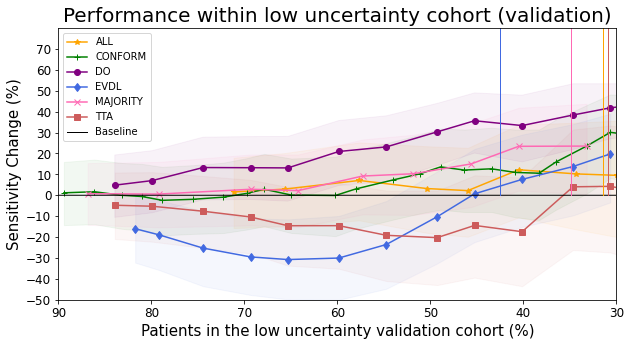

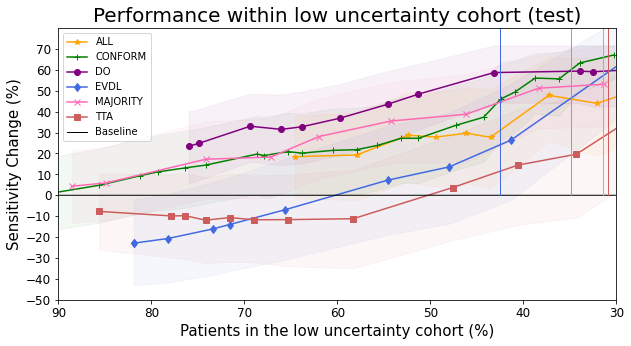

In [2]:
load_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\save_folder\sens_spec'
# load_ratio_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\ratio'

import pickle
val_name_save= r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\val_cuts.pkl'
valtotal_name_save= r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\val_cuts_total.pkl'

# test_name_save=r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\test_cuts.pkl'
testtotal_name_save=r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\test_cuts_total.pkl'


with open(valtotal_name_save, 'rb') as f:
    val_cuts_total = pickle.load(f)
    
with open(val_name_save, 'rb') as f:
    val_cuts = pickle.load(f)
    
with open(testtotal_name_save, 'rb') as f:
    test_cuts_total = pickle.load(f)

print_ = True

legend_line_color = [('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), 
                     ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')]

legend = []
reorder = [('epi', 0), ('tta', 1), ('conform', 2), ('majority', 3), ('all', 4), ('evdl', 5)]

print(sorted([x for x in os.listdir(load_dir) if 'csv' in x]))

reorder_list = []

for x, _ in reorder:
    reorder_list.extend([y for y in os.listdir(load_dir) if x in y])
    
y_lim = [-50, 80]
x_lim = [30, 90]


plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file and 'spec' not in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['l_sens_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['l_sens_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(-20, 30, 5), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    print(legend_line_color, jj)
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within low uncertainty cohort (validation)', fontsize=20)
plt.ylabel('Sensitivity Change (%)', fontsize=15)
plt.xlabel('Patients in the low uncertainty validation cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1a val low sens-yi - rescaled-ratio.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file and 'spec' not in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['l_sens_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['l_sens_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(-20, 30, 5), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    a = [x[0] for x in test_cuts_total if x[1].lower() in jj.lower()][0]
    index = np.argmin(np.abs(np.array(a)-ii))
    print(ii, a[index]) 
    
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within low uncertainty cohort (test)', fontsize=20)
plt.ylabel('Sensitivity Change (%)', fontsize=15)
plt.xlabel('Patients in the low uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1b test low sens-yi - rescaled-ratio.png', dpi=300)


[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] TTA
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] MAJORITY
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] ALL
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] EVDL
30.87299270073008 27.67527675276753
34.91167883211681 38.37638376383764
31.46277372262787 32.10332103321033
42.55693430656952 41.32841328413284


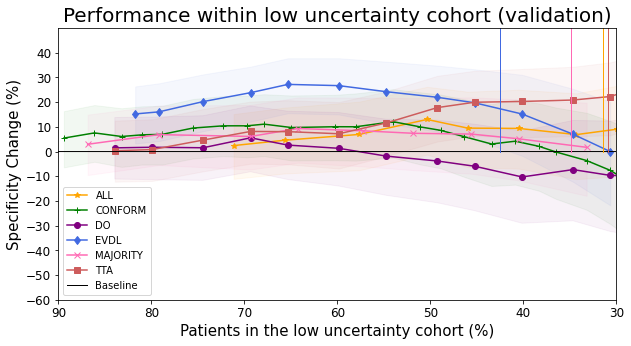

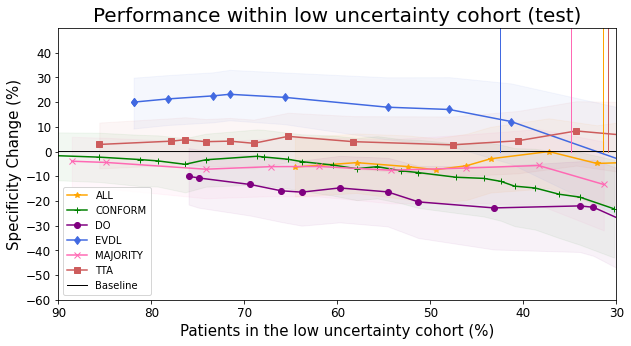

In [3]:

y_lim = [-60, 50]
x_lim = [30, 90]

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file and 'spec' in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['l_spec_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['l_spec_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    print(legend_line_color, jj)
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within low uncertainty cohort (validation)', fontsize=20)
plt.ylabel('Specificity Change (%)', fontsize=15)
plt.xlabel('Patients in the low uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1a val low spec-yi - rescaled-ratio.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file and 'spec' in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['l_spec_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['l_spec_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    a = [x[0] for x in test_cuts_total if x[1].lower() in jj.lower()][0]
    index = np.argmin(np.abs(np.array(a)-ii))
    print(ii, a[index]) 
    
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)


plt.title('Performance within low uncertainty cohort (test)', fontsize=20)
plt.ylabel('Specificity Change (%)', fontsize=15)
plt.xlabel('Patients in the low uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1b test low spec-yi - rescaled-ratio.png', dpi=300)


[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] TTA
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] MAJORITY
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] ALL
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] EVDL
30.87299270073008 27.67527675276753
34.91167883211681 38.37638376383764
31.46277372262787 32.10332103321033
42.55693430656952 41.32841328413284


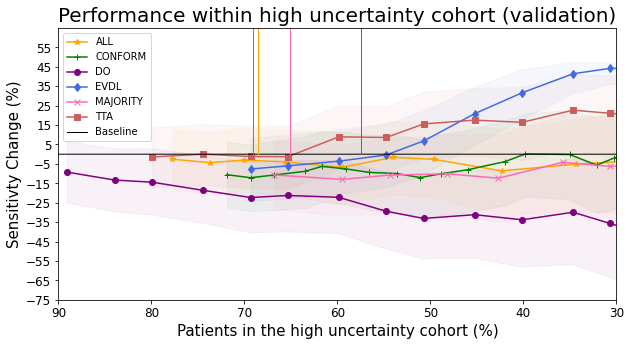

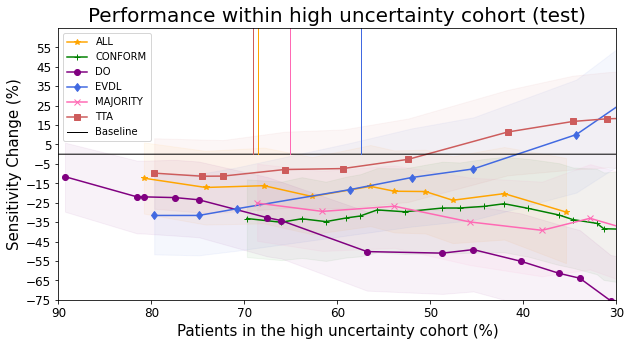

In [4]:
y_lim = [-75, 65]
x_lim = [30, 90]

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file and 'spec' not in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['h_sens_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['h_sens_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    print(legend_line_color, jj)
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([100-ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within high uncertainty cohort (validation)', fontsize=20)
plt.ylabel('Sensitivty Change (%)', fontsize=15)
plt.xlabel('Patients in the high uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1c val high sens-yi - rescaled-ratio.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file and 'spec' not in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['h_sens_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['h_sens_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    a = [x[0] for x in test_cuts_total if x[1].lower() in jj.lower()][0]
    index = np.argmin(np.abs(np.array(a)-ii))
    print(ii, a[index]) 
    
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([100-ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within high uncertainty cohort (test)', fontsize=20)
plt.ylabel('Sensitivity Change (%)', fontsize=15)
plt.xlabel('Patients in the high uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1d test high sens-yi - rescaled-ratio.png', dpi=300)

[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] TTA
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] MAJORITY
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] ALL
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] EVDL
30.87299270073008 27.67527675276753
34.91167883211681 38.37638376383764
31.46277372262787 32.10332103321033
42.55693430656952 41.32841328413284


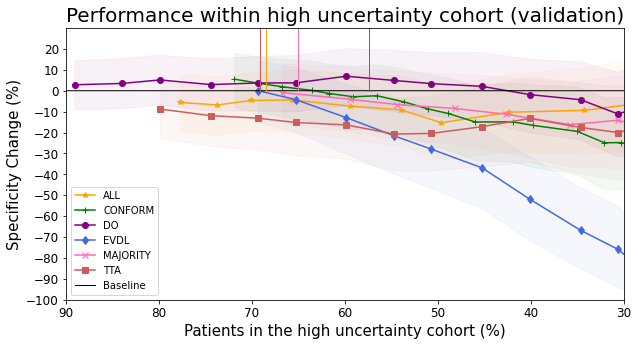

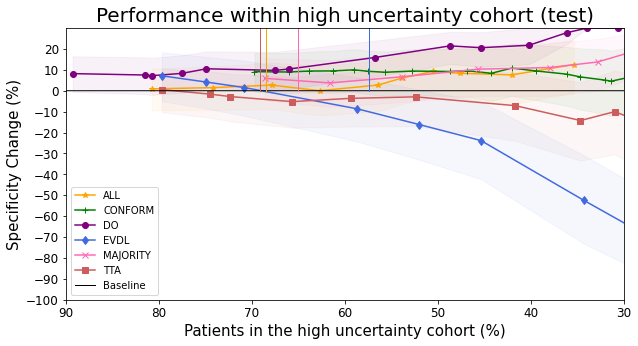

In [5]:
y_lim = [-100, 30]
x_lim = [30, 90]

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file and 'spec' in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['h_spec_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['h_spec_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    print(legend_line_color, jj)
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([100 - ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within high uncertainty cohort (validation)', fontsize=20)
plt.ylabel('Specificity Change (%)', fontsize=15)
plt.xlabel('Patients in the high uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1c val high spec-yi - rescaled-ratio.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file and 'spec' in file and 'ppv' not in file and 'npv' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        y1_minus = ast.literal_eval(df['h_spec_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['h_spec_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    a = [x[0] for x in test_cuts_total if x[1].lower() in jj.lower()][0]
    index = np.argmin(np.abs(np.array(a)-ii))
    print(ii, a[index]) 
    
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([100 - ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within high uncertainty cohort (test)', fontsize=20)
plt.ylabel('Specificity Change (%)', fontsize=15)
plt.xlabel('Patients in the high uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(y_lim[0], y_lim[1], 10), fontsize=12)
plt.legend(legend)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1d test high spec-yi - rescaled-ratio.png', dpi=300)